In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [68]:
# Load datasets
train_data = pd.read_csv("nba_combined_1980_2015.csv")
test_data = pd.read_csv("nba_combined_2016_2024.csv")

# Define features and target
features = [
    'G', 'MP', 'PTS', 'eFG%', 'TS%', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'EFF',   
    'MVP_count', 'MVP_nominations', 'AS'
]
target = 'MVP'

# Prepare data
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

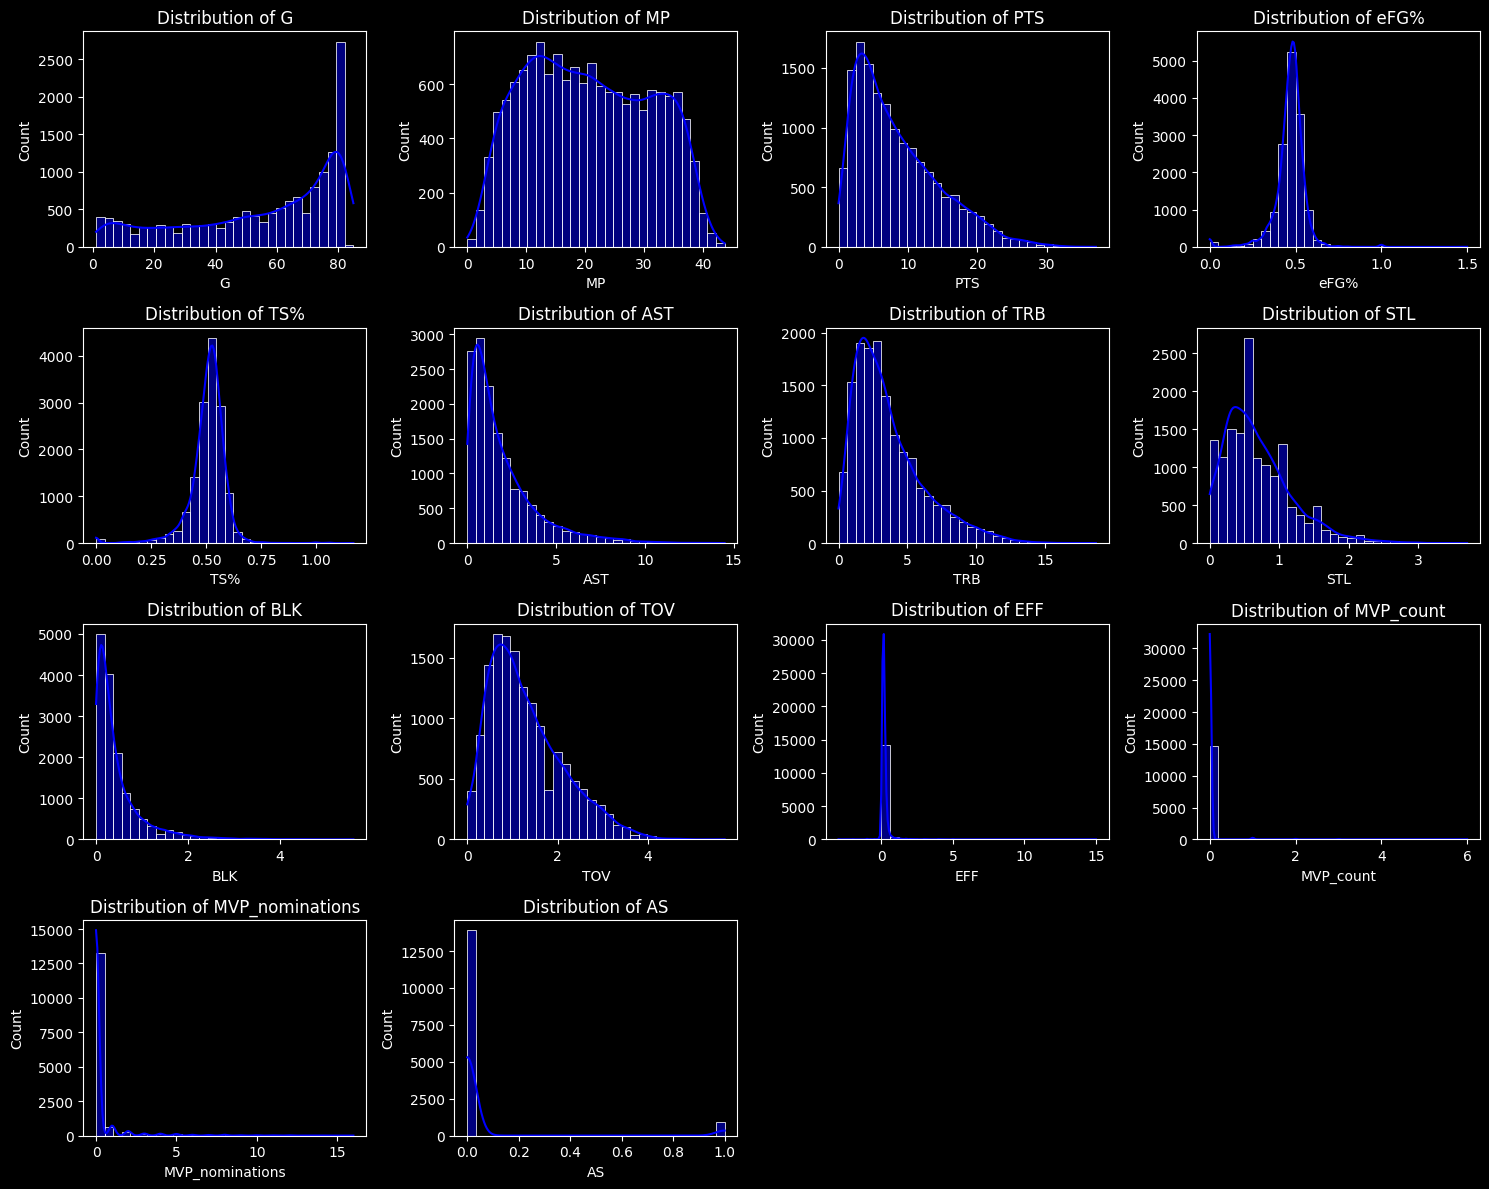

In [69]:
# ----- Visualization 1: Feature Distributions -----
plt.figure(figsize=(15, 12))  # Increase figure height for 11 plots
for i, col in enumerate(features):  # Plot all features
    plt.subplot(4, 4, i + 1)  # Arrange in 4 rows and 4 columns (16 total spaces)
    sns.histplot(train_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

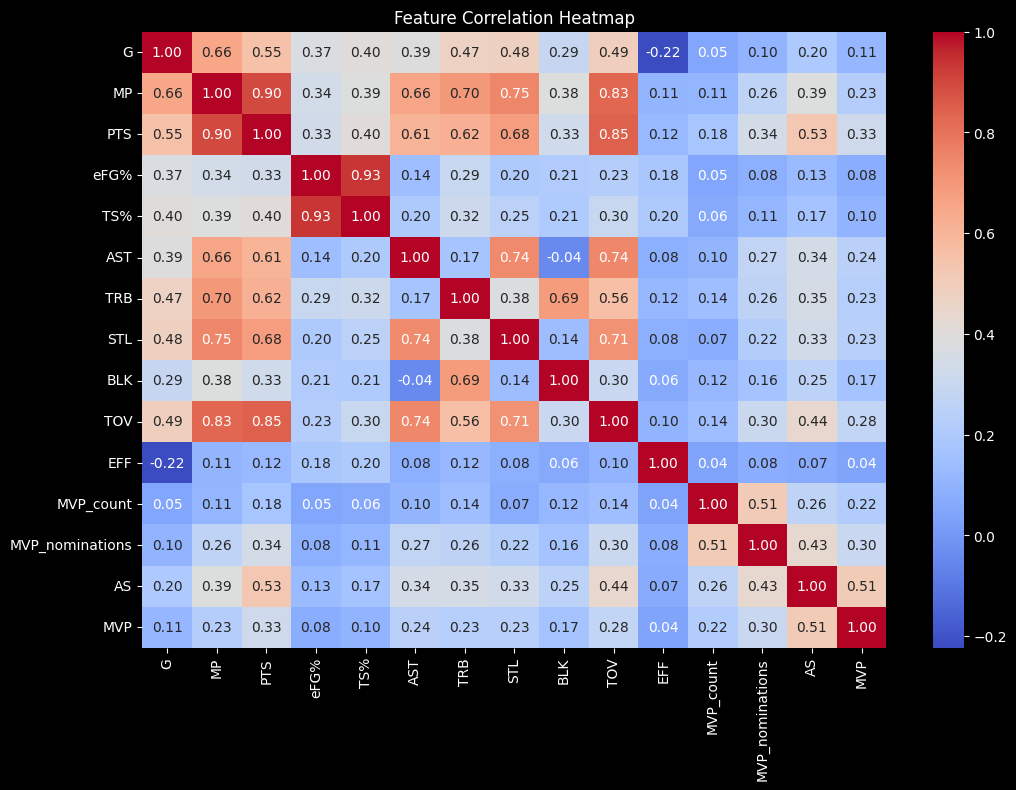

In [70]:
# ----- Visualization 2: Correlation Heatmap -----
# Calculate the correlation matrix for the selected features and target
correlation = train_data[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

/tmp/ipykernel_17662/252490669.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


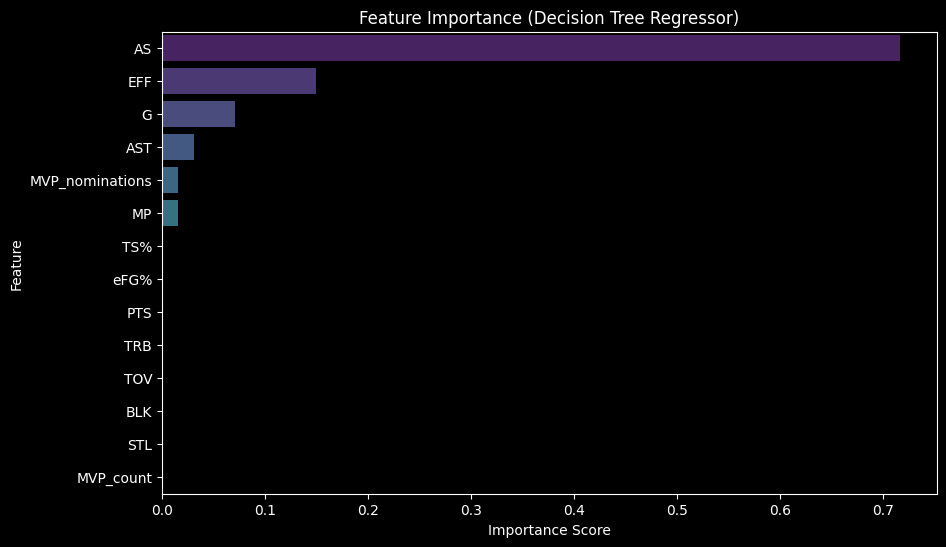

In [71]:
# ----- Visualization 3: Feature Importance -----
# Fit a simple Decision Tree Regressor to identify feature importance
from sklearn.tree import DecisionTreeRegressor

# Fit a Decision Tree Regressor model (for regression tasks like predicting MVP rank)
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Feature importance plot
importances = pd.DataFrame({'Feature': features, 'Importance': tree_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_17662/1396323781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=target, y='MVP_count', palette='Set2')
/tmp/ipykernel_17662/1396323781.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=target, y='MVP_nominations', palette='Set3')


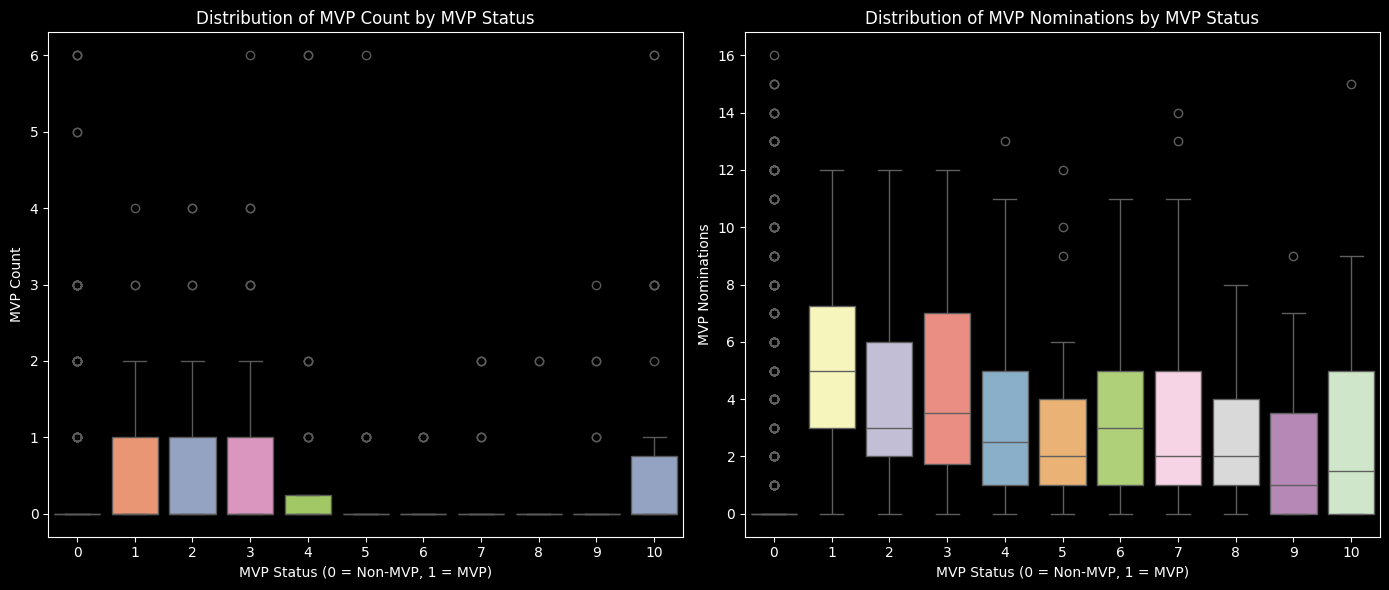

In [72]:
# ----- Visualization 4: MVP-Related Features -----
plt.figure(figsize=(14, 6))

# Boxplot for MVP Count
plt.subplot(1, 2, 1)
sns.boxplot(data=train_data, x=target, y='MVP_count', palette='Set2')
plt.title('Distribution of MVP Count by MVP Status')
plt.xlabel('MVP Status (0 = Non-MVP, 1 = MVP)')
plt.ylabel('MVP Count')

# Boxplot for MVP Nominations
plt.subplot(1, 2, 2)
sns.boxplot(data=train_data, x=target, y='MVP_nominations', palette='Set3')
plt.title('Distribution of MVP Nominations by MVP Status')
plt.xlabel('MVP Status (0 = Non-MVP, 1 = MVP)')
plt.ylabel('MVP Nominations')

# Adjust layout
plt.tight_layout()
plt.show()


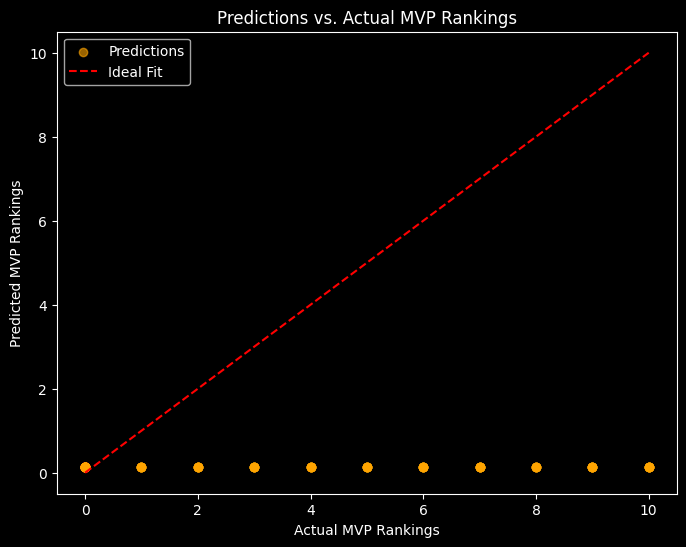

Root Mean Squared Error (RMSE): 0.8143


In [73]:
# ----- Visualization 5: Predictions vs. Actual Truth -----
# Fit dummy regressor
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)

# Scatter plot of predictions vs. actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', label='Predictions')
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    color='red', linestyle='--', label='Ideal Fit'
)
plt.title('Predictions vs. Actual MVP Rankings')
plt.xlabel('Actual MVP Rankings')
plt.ylabel('Predicted MVP Rankings')
plt.legend()
plt.show()

# Performance metrics
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


In [74]:
from sklearn.ensemble import RandomForestRegressor  


# Load datasets
train_data = pd.read_csv("nba_combined_1980_2015.csv")
test_data = pd.read_csv(f"{'processed_data'}/nba_player_stats_2023-24_processed.csv")

# Define features and target
features = [
    'G', 'MP', 'PTS', 'eFG%', 'TS%', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'EFF',   
    'MVP_count', 'MVP_nominations', 'AS'
]
target = 'MVP'

# Prepare data
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Train the model on historical data
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Predict MVP scores for the 2023-24 season
y_pred_2023_24 = model.predict(X_test)

# Add predictions to the test data
test_data['Predicted_MVP_Score'] = y_pred_2023_24

# Rank players by predicted MVP score (1 = highest score)
test_data['MVP_Rank'] = test_data['Predicted_MVP_Score'].rank(method='min', ascending=False)

# Filter top 10 players
top_10_mvp_candidates = test_data.sort_values(by='MVP_Rank').head(10)

# Display the top 10 MVP nominees
top_10_mvp_candidates[['Player', 'Team', 'Season', 'Predicted_MVP_Score', 'MVP_Rank']]


,Player,Team,Season,Predicted_MVP_Score,MVP_Rank
13,Tyrese Maxey,PHI,2023-24,3.701467,1.0
24,Kawhi Leonard,LAC,2023-24,3.616784,2.0
19,Damian Lillard,MIL,2023-24,3.569160,3.0
1,Luka Dončić,DAL,2023-24,3.547353,4.0
14,LeBron James,LAL,2023-24,3.400976,5.0
2,Giannis Antetokounmpo,MIL,2023-24,3.395663,6.0
6,Kevin Durant,PHO,2023-24,3.370281,7.0
11,Nikola Jokić,DEN,2023-24,3.368666,8.0
0,Joel Embiid,PHI,2023-24,3.363121,9.0
18,Anthony Davis,LAL,2023-24,3.362962,10.0
